# Text Classification challenge

You are required to train a deep learning model on the IMDB reviews dataset and classify a set of new reviews as positive(1) or negative(0) using the trained model.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.6.0


## Downloading the TensorFlow `imdb_review` dataset

> Make sure tensorflow_datasets is installed

In [2]:
##load the imdb reviews dataset
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUXIPYE/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUXIPYE/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUXIPYE/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Segregating training and testing sets

In [4]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [6]:
##iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())



In [7]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Data preparation - setting up the tokenizer

In [8]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Define the Neural Network with Embedding layer

1. Use the Sequential API.
2. Add an embedding input layer of input size equal to vocabulary size.
3. Add a flatten layer, and two dense layers.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [11]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    train_labels, # training labels
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels) # test data
    )

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4961 - accuracy: 0.7864 - val_loss: 0.3247 - val_accuracy: 0.8680
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2765 - accuracy: 0.8915 - val_loss: 0.2897 - val_accuracy: 0.8800
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2232 - accuracy: 0.9154 - val_loss: 0.2971 - val_accuracy: 0.8768
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1900 - accuracy: 0.9302 - val_loss: 0.3123 - val_accuracy: 0.8722
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1642 - accuracy: 0.9430 - val_loss: 0.3438 - val_accuracy: 0.8640
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1443 - accuracy: 0.9495 - val_loss: 0.3652 - val_accuracy: 0.8642
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1285 - accuracy: 0.9571 - val_loss: 0.3980 - val_accuracy: 0.8592
Epoch 

## Visualise the train & validation accuracy and loss

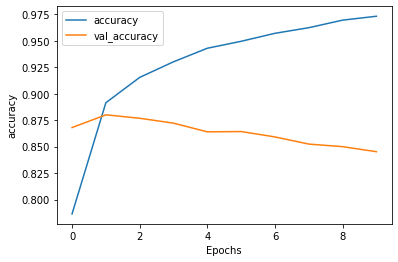

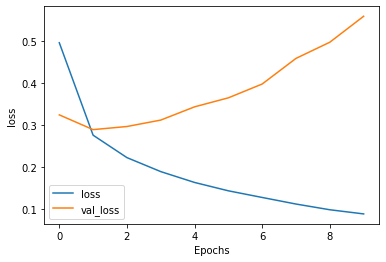

In [13]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

## Classify new reviews

In [15]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, all seven hours of it, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.08267379]
 [0.70886207]]
